# Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fd = pd.read_csv("fraud.csv")

In [3]:
fd.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
fd.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [6]:
fd.isnull().sum() #to check null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
print(fd.dtypes) # to see the data types of our variables

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


"There are no null values, so we don't have to work on ways to replace values."

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


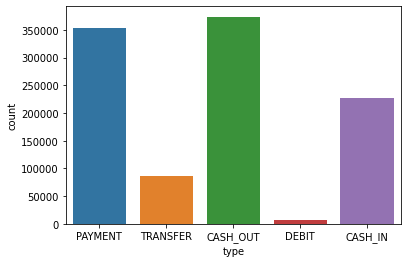

In [8]:
sns.countplot(fd['type'])
plt.show()

In [9]:
fd['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

Text(0.5, 1.0, 'Transaction types')

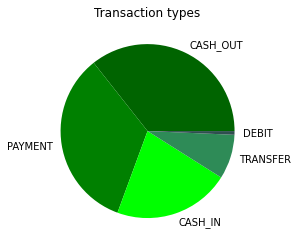

In [10]:
colors = ['#006400','#008000','#00FF00','#2E8B57','#2F4F4F']
plt.pie(fd['type'].value_counts().values,labels = fd['type'].value_counts().index,
        colors = colors)
plt.title('Transaction types')

In [11]:
correlation = fd.corr()

In [12]:
fd.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.025996,-0.006780,-0.007180,-0.002251,-0.019503,0.045030,NaN
amount,-0.025996,1.000000,0.004864,-0.001133,0.215558,0.311936,0.128862,NaN
oldbalanceOrg,-0.006780,0.004864,1.000000,0.999047,0.093305,0.064049,0.003829,NaN
newbalanceOrig,-0.007180,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.009438,NaN
oldbalanceDest,-0.002251,0.215558,0.093305,0.095182,1.000000,0.978403,-0.007552,NaN
newbalanceDest,-0.019503,0.311936,0.064049,0.063725,0.978403,1.000000,-0.000495,NaN
isFraud,0.045030,0.128862,0.003829,-0.009438,-0.007552,-0.000495,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

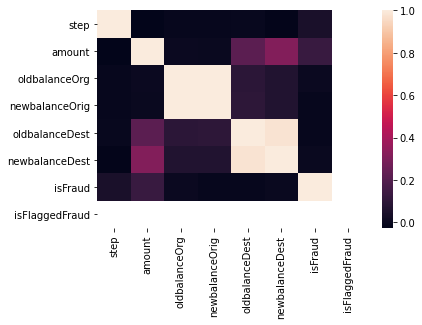

In [13]:
sns.heatmap(fd.corr())

In [14]:
correlation['isFraud'].reset_index().sort_values('isFraud',ascending = False)

,index,isFraud
6,isFraud,1.000000
1,amount,0.128862
0,step,0.045030
2,oldbalanceOrg,0.003829
5,newbalanceDest,-0.000495
4,oldbalanceDest,-0.007552
3,newbalanceOrig,-0.009438
7,isFlaggedFraud,NaN


In [15]:
fd['isFraud'].value_counts()


0    1047433
1       1142
Name: isFraud, dtype: int64

In [18]:
X = fd.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest
0,PAYMENT,9839.64,160296.36,0.0
1,PAYMENT,1864.28,19384.72,0.0
2,TRANSFER,181.00,0.00,0.0
3,CASH_OUT,181.00,0.00,21182.0
4,PAYMENT,11668.14,29885.86,0.0


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


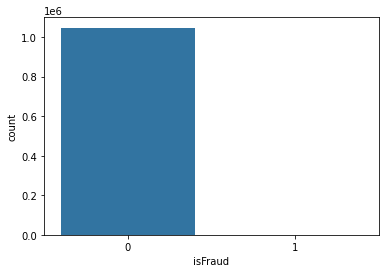

In [19]:
sns.countplot(fd['isFraud'])
plt.show()

In [20]:
fd.shape

(1048575, 11)

In [21]:
100*(6354407/6362620)

99.87091795518198

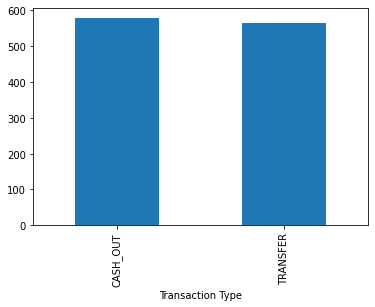

In [22]:
fraud = fd['isFraud'].isin([1])

fraud_time = fd[fraud].groupby(['type']).size().plot(kind='bar')
fraud_time.set_xlabel("Transaction Type")

plt.show()

In [23]:
print("Are there any mismatch in the balance at origin and destination after transaction?")

fd['origBalance_inacc'] = (fd["oldbalanceOrg"] - fd["amount"] != fd["newbalanceOrig"]).astype(int)
fd['destBalance_inacc'] = (fd["oldbalanceDest"] + fd["amount"] != fd["newbalanceDest"]).astype(int)

print("Balance Error(%) at the origin:",round(fd['origBalance_inacc'].value_counts()[1]/fd.shape[0] * 100,2))

print("Balance Error(%) at the destination:",round(fd['destBalance_inacc'].value_counts()[1]/fd.shape[0] * 100,2))

Are there any mismatch in the balance at origin and destination after transaction?
Balance Error(%) at the origin: 84.44
Balance Error(%) at the destination: 81.11


In [24]:
print("Number of transactions with amount is less 0?")
print(len(fd[fd.amount<0]))

print("Number of transactions with amount is equal to 0?")
print(len(fd[fd.amount==0]))

Number of transactions with amount is less 0?
0
Number of transactions with amount is equal to 0?
0


In [27]:
fd['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [28]:
type_map = {
    'PAYMENT':'OTHERS',
    'TRANSFER':'TRANSFER',
    'CASH_OUT':'CASH_OUT',
    'DEBIT':'OTHERS',
    'CASH_IN':'OTHERS'
}

In [29]:
fd['type'] = fd['type'].map(type_map)

fd['type'].unique()

array(['OTHERS', 'TRANSFER', 'CASH_OUT'], dtype=object)

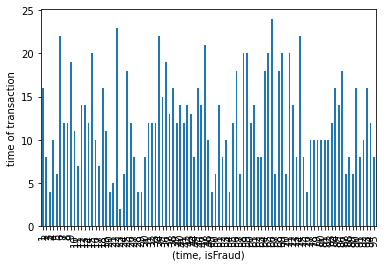

In [30]:
fraud = fd['isFraud'].isin([1])

fraud_time = fd[fraud].groupby(['step']).size().plot(kind='bar')
fraud_time.set_xlabel("(time, isFraud)")
fraud_time.set_ylabel("time of transaction")
plt.show()

In [31]:
y = fd['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [32]:
X = fd.drop(columns=['step', 'newbalanceDest','oldbalanceOrg','nameOrig','nameDest','isFlaggedFraud','isFraud'])

X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [33]:
y.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [34]:
fd['type'].value_counts()

OTHERS      588181
CASH_OUT    373641
TRANSFER     86753
Name: type, dtype: int64

In [35]:
X.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc
0,OTHERS,9839.64,160296.36,0.0,0,1
1,OTHERS,1864.28,19384.72,0.0,0,1
2,TRANSFER,181.00,0.00,0.0,0,1
3,CASH_OUT,181.00,0.00,21182.0,0,1
4,OTHERS,11668.14,29885.86,0.0,0,1


In [36]:
#fd['type'] = fd['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
dummies_type = pd.get_dummies(X_train['type'], prefix='type', drop_first=True)

In [39]:
X_train = pd.concat([X_train, dummies_type], axis=1)

In [40]:
X_train.head()

,type,amount,newbalanceOrig,oldbalanceDest,origBalance_inacc,destBalance_inacc,type_OTHERS,type_TRANSFER
664918,CASH_OUT,352265.95,0.00,1830686.45,1,1,0,0
741964,OTHERS,6839.81,0.00,0.00,1,1,1,0
314050,OTHERS,189558.87,1337776.35,608722.11,1,1,1,0
631759,OTHERS,11593.26,0.00,0.00,1,1,1,0
555223,CASH_OUT,109714.54,0.00,85409.59,1,1,0,0


In [41]:
X_train = X_train.drop(columns=['type'])

In [42]:
dummies_type = pd.get_dummies(X_test['type'], prefix='type', drop_first=True)

In [43]:
X_test = pd.concat([X_test, dummies_type], axis=1)

In [44]:
X_test = X_test.drop(columns=['type'])

In [45]:
(X_train.columns == X_test.columns).all()

True

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")

lr_model = lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.5379186775713088


In [56]:
from sklearn.metrics import classification_report
print("Classification Report:\n\n", classification_report(y_test, y_pred)) # performance metrices of our model

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.54      0.70    345655
           1       0.00      0.92      0.00       375

    accuracy                           0.54    346030
   macro avg       0.50      0.73      0.35    346030
weighted avg       1.00      0.54      0.70    346030



c:\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


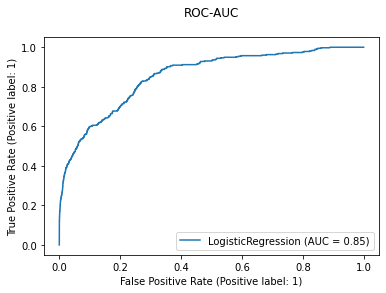

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()  # performance evaluation

An AUC (Area Under the Curve) of 0.85 in a fraudulent transaction dataset means that the model's ability to distinguish between fraudulent and non-fraudulent transactions is fairly good.

In [50]:
fd['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced")

In [79]:
rf_model = rf.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9999711007716094

In [80]:
rf_params = {
    'n_estimators' : [50,100,130,150],
    'max_depth' : [4,5,1,2,None],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' : [1,4,10,20],
    'max_leaf_nodes' : [2,5,10,None]
    
}

In [81]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
rf_rs = RandomizedSearchCV(rf, rf_params, cv=5, n_iter=5)

In [ ]:
rf_best_model = rf_rs.fit(X_train, y_train)

In [ ]:
rf_best_model.score(X_test, y_test)

In [ ]:
y_pred = rf_best_model.predict(X_test)

In [ ]:
plot_confusion_matrix(rf_best_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
tree = DecisionTreeClassifier()
model = tree.fit(X_train,y_train)

In [67]:
model.score(X_test,y_test)

0.9999335317747016